In [2]:
import sys
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import gensim 
import warnings
warnings.filterwarnings('ignore')

In [9]:
okt = Okt()

In [3]:
movie_n = pd.read_csv('naver_movie_192021.csv')

### 댓글에서 코로나가 언급된 영화

In [4]:
coronacontent = movie_n[movie_n['content'].str.contains('코로나')]

In [5]:
ccontent = coronacontent['content'].tolist()

In [86]:
ccontent = coronacontent['content']

In [88]:
ccontent.to_csv('test_b.txt', index=False)

In [90]:
f = open('test_b.txt','r',encoding='utf-8')
rev = f.read()

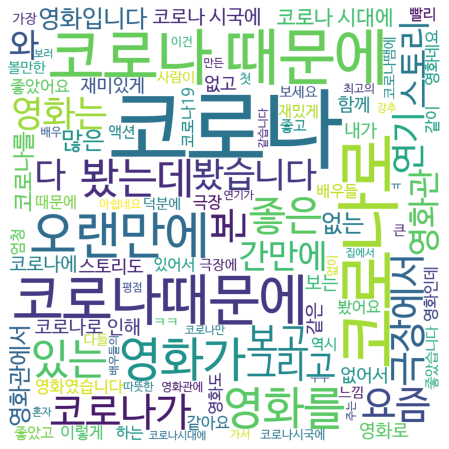

In [93]:
def get_noun(filename):
    f = open(filename,'r',encoding='utf-8')
    rev = f.read()
    # okt
    okt = Okt()
    noun = okt.nouns(rev)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)

    count = Counter(noun)

    # 명사 빈도 카운트
    noun_list = count.most_common(100)
    return noun_list

def wordCloud(noun_list):
    wc = WordCloud(font_path='NanumBarunGothic.ttf',
                    width=1000,
                    height=1000,
                    max_words=100,
                    max_font_size=200,
                    background_color='white',
                    stopwords=stop_words)#.generate_from_frequencies(dict(data))
    wc.generate(rev)
    plt.figure(figsize=(24, 8))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

if __name__=="__main__":
    filename= 'test_b.txt'
    wordCloud(get_noun(filename))

In [7]:
ccontent[:10]

['코로나땜에 집에서 5500원주고 결제했는데 눈이 썩어버렸다',
 '살면서 이런 글 처음 남겨봅니다. 영화 내용에서 뭘 알려주고자 하는지 봉준호 감독 본인이 더 잘 알았을텐데요. 지금 국민들은 코로나 바이러스 때문에 집밖도 못나가고 갇혀있는데 기득권층끼리 앉아서 하하호호 짜파구리 먹...',
 '코로나 첫 사망자가 발생한 날, 청와대에서는 대통령과 감독이 짜파구리를 먹으며 성대한 오찬이 벌어지고 있었다. 기생충의 플롯이 현실에서 완성되는 순간.',
 '영화로 부족했는지 현실판 기생충을 몸소 대통령과 함께 어제 보여주시던데요. 첨에 10점 드렸는데 어제 코로나 대거 확산됐는데 보여준 모습에 너무 실망해서 1점 드리고 갑니다.',
 '너무 더워서 열 좀 내릴려고 네이버에서 무료다운 받았는데, 관람후 학원 갔다가 37.5도 넘어서서 코로나 증상아니냐며 집으로 가라고 함.',
 '악당들이 코로나 대비를 아주 잘해요, 막판 싸움에서 마스크를 아주 잘 썼어요. 그래서 10점 드립니다. 영화 자체는 재미없어요 하하하~',
 '마음의 평점은 7점정도 되지만 배경으로 우한이 나오는 바람에 코로나 생각나서 -5점',
 '코로나는 이미 이 영화에서부터 시작되었다. 어안이 벙벙해서 후각, 미각 그리고 시각까지 상실할 만한 영화.',
 '코로나 돌기전에 우한에서 찍은 영화',
 '코로나 덕분에 대학 가기전에 이런영화를 보네요. 앞으로의 대학생활, 그리고 제가 할 디자인에 대한 방향이 생겼습니다. 2500원주고 보는게 부끄럽네요.']

In [8]:
coronacontent.groupby('title')['title'].count().sort_values(ascending=False)

title
새해전야           32
결백             29
최미역행           24
팬데믹            23
다크 워터스         20
               ..
아픈 만큼 사랑한다      1
아홉 스님           1
아홉수 로맨스         1
암전              1
나이스 걸 라이크 유     1
Name: title, Length: 429, dtype: int64

In [9]:
coronacontent[coronacontent['title']=='새해전야']['content']

211281    코로나 전 세상은 이렇게 시끌벅적하고 평화로웠구나 새삼 느꼈습니다.그냥 그 느낌, ...
211284     보는내내 행복했어요?? 연말에 봣슴 더 감성 넘쳤을텐테.. 얼렁 코로나가 사라지길...
211289                코로나로 우울했던 마음 힐링 받았어요!!아 아르헨티나로 떠나고 싶다
211290    유배우님 연기가 대박이였어요~요즘에 코로나 땜에 여행을 못 가는데....영화관에서 ...
211298    코로나19만 아니었어도 관객도 많이 오고, 준수한 성적을 냈을 거 같네요. 좋은 영...
211335    너무 재밌고 잔잔하고 분위기가 다한 영화에요 깨알같은 명대사들도 좋고 코로나 시국에...
211336    이 영화는 소소한 일상이 배경인 남들의 연애사입니다. 특별하지않아서 더 즐겁게 볼 ...
211338    코로나시대에 볼수없는 그이전을 상상하면서 각기 다른 인생에서 칮을수있는 각자의 행복...
211344     너무 잔인하지도 않고...슬프지도 않고...20대 여성들 감성저격하는 영화인거 같...
211359    댓글 알바 아니고 난 진짜 괜찮았는데 유연석 배우님 때문에 봤지만 꽤 괜찮았고 코로...
211360    간만에 힐링했네요^^ 아~ 떠나고 싶다~ 이 지긋지긋한 코로나를 벗어나 어디든~ 쉼...
211372                                  코로나 아니었으면 흥행 했을 듯..
211377                코로나 시대에 행복한 여행을 다녀온 기분입니다. 다시 보고싶은 영화
211378    새해를 잘 시작할 수 있게 용기를 주는 영화였어요 코로나때문에 우울한기분이 좋아지고...
211389    오랜만에 가족과 함께 행복한 시간 되었습니다. 스토리 전개가 지루하지 않고 감동과 ...
211394    작년에 코로나 땜에 우리 모두 많이 힘들었는지 힐링영화 자주 즐겨보는편 아닌데 즐겁...
211405                    여행 가고 싶어지는 영화에

In [22]:
stop_words = list(set(stop_words))

In [24]:
from collections import Counter

#### `코로나` 단어를 포함하고 있는 리뷰의 영화 개 수 : `429`

In [212]:
coronacontent['title'].nunique()

429

In [416]:
coronacontent['title'].value_counts()[:25]

새해전야                32
결백                  29
최미역행                24
팬데믹                 23
이번엔 잘 되겠지           20
다크 워터스              20
지푸라기라도 잡고 싶은 짐승들    19
서치 아웃               18
검객                  18
찬실이는 복도 많지          17
침입자                 17
800                 16
파이프라인               16
인비저블맨               16
모가디슈                14
온워드: 단 하루의 기적       14
오케이 마담              14
블러드샷                13
이웃사촌                13
사랑하고 있습니까           12
#살아있다               12
마이 스파이              12
자산어보                12
광대: 소리꾼 감독판         12
원더 우먼 1984          11
Name: title, dtype: int64

## TF-IDF를 통해 유사한 영화검색
* (데이터의 개수, 리뷰를 기반으로 고유 단어들의 개수)

* tfidf.`fit_transform` → 전체 문장에 대한 특징 벡터 데이터 

In [94]:
coronacontent = movie_n[movie_n['content'].str.contains('코로나')]coronacontent

In [302]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(coronacontent.content)
# 영화 리뷰에 대해서 tf-idf 수행 TF-IDF 값으로 벡터화
print(tfidf_matrix.shape)

(1546, 11973)


* 리뷰 수 : 1546 개
* 고유 단어 : 11973 개

## 코사인 유사도 계산
* 사이킷런에서 TF-IDF 매트릭스를 통해 바로 코사인 유사도 매트릭스를 구현할 수 있는 함수를 제공

* 각 셀은 `코사인 유사도 수치`를 의미하며
* 1의 값이 나와있는 곳은 행과 열이 동일한 데이터이기에 해당 값이 산출되었고, 0인곳은 줄거리 상 아예 `같은 단어가 없을 때`(벡터 사이의 각이 90도일 때)를 의미한다!!

In [97]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
# from sklearn.metrics.pairwise import linear_kernel
# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [98]:
cosine_matrix # cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00393515, ..., 0.        , 0.03095787,
        0.        ],
       [0.        , 0.00393515, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.07223995],
       [0.        , 0.03095787, 0.        , ..., 0.        , 1.        ,
        0.03850697],
       [0.        , 0.        , 0.        , ..., 0.07223995, 0.03850697,
        1.        ]])

---

#### 인덱스 테이블 만들기
* 인덱스가 영화 명이고 인덱스 번호가 값인 판다스 시리즈 배열
*해당 배열에 영화명을 입력하면 그에 해당하는 인덱스 번호를 추출한다.

In [101]:
# movie title와 id를 매핑할 dictionary를 생성해줍니다. 
movie_id = {}
for i, c in enumerate(coronacontent['title']): movie_id[i] = c

# id와 movie title를 매핑할 dictionary를 생성해줍니다. 
id_movie = {}
for i, c in movie_id.items(): id_movie[c] = i

In [104]:
movie_id[0]

'6솔져스'

In [105]:
id_movie['기생충']

3

In [107]:
id_movie['새해전야']

1303

## 상위 10개 영화 추천

In [108]:
# 새해전야의 id 추출 
idx = id_movie['새해전야'] # 새해전야 : 1303번 인덱스 
sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[idx]) if i != idx] 
# 자기 자신을 제외한 영화들의 유사도 및 인덱스를 추출 
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) 
# 유사도가 높은 순서대로 정렬 
sim_scores[0:10] # 상위 10개의 인덱스와 유사도를 추출 

[(531, 0.15999637772232694),
 (1466, 0.10723419295577102),
 (1038, 0.09886836172370028),
 (158, 0.09866026678605848),
 (1174, 0.08859925634662559),
 (1433, 0.08588982374226099),
 (1118, 0.0837779681659507),
 (968, 0.08193171718741156),
 (436, 0.08111458286391329),
 (350, 0.0781341011469959)]

In [109]:
# 인덱스를 Movie Title로 변환 
sim_scores = [(movie_id[i], score) for i, score in sim_scores[0:10]]
sim_scores

[('삼진그룹 영어토익반', 0.15999637772232694),
 ('콰이어트 플레이스 2', 0.10723419295577102),
 ('프리키 데스데이', 0.09886836172370028),
 ('공수도', 0.09866026678605848),
 ('리스타트', 0.08859925634662559),
 ('자산어보', 0.08588982374226099),
 ('노바디', 0.0837779681659507),
 ('테스와 보낸 여름', 0.08193171718741156),
 ('밤쉘: 세상을 바꾼 폭탄선언', 0.08111458286391329),
 ('디바', 0.0781341011469959)]

In [110]:
# 기생충 id 추출 
idx = id_movie['기생충'] # 기생충 : 3번 인덱스 
sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[idx]) if i != idx] 
# 자기 자신을 제외한 영화들의 유사도 및 인덱스를 추출 
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) 
# 유사도가 높은 순서대로 정렬 
sim_scores[0:10] # 상위 10개의 인덱스와 유사도를 추출 

[(1333, 0.08156119522287239),
 (1114, 0.07389517330398172),
 (848, 0.0731608348159902),
 (1286, 0.07157326300525123),
 (539, 0.06767139544111657),
 (1478, 0.06220234901110424),
 (1055, 0.055501934075252966),
 (2, 0.05525693550242305),
 (907, 0.055035663522675),
 (1251, 0.054524178186033785)]

In [111]:
# 인덱스를 Movie Title로 변환 
sim_scores = [(movie_id[i], score) for i, score in sim_scores[0:10]]
sim_scores

[('스쿨 아웃 포에버', 0.08156119522287239),
 ('내일의 기억', 0.07389517330398172),
 ('찬실이는 복도 많지', 0.0731608348159902),
 ('새해전야', 0.07157326300525123),
 ('서치 아웃', 0.06767139544111657),
 ('크루즈 패밀리: 뉴 에이지', 0.06220234901110424),
 ('CCTV', 0.055501934075252966),
 ('기생충', 0.05525693550242305),
 ('침입자', 0.055035663522675),
 ('분노의 질주: 더 얼티메이트', 0.054524178186033785)]

---

In [10]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

---

## 긍정/ 부정리뷰 비교분석

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname="NanumbarunGothic.ttf").get_name()

rc('font',family=font_name)

In [168]:
coronacontent['score'].unique()

array([ 1, 10,  2,  8,  9,  3,  4,  6,  7,  5], dtype=int64)

In [169]:
scores = list(coronacontent['score'].value_counts().sort_index())

In [170]:
scores

[249, 85, 16, 21, 9, 44, 24, 105, 90, 903]

In [187]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '평점 별 리뷰 개수')

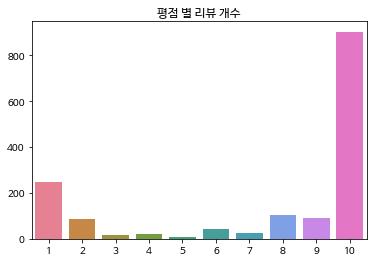

In [211]:
sns.barplot(list(range(1,11)), scores, palette='husl')
plt.title('평점 별 리뷰 개수')

<AxesSubplot:>

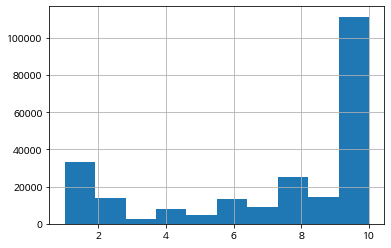

In [303]:
#### movie_n['score'].hist()

In [ ]:
coronacontent

`코로나` 단어를 포함한 리뷰이지만, 아쉽다는 의견- 긍정일 수도 있고, 부정일 수도 있으니 평점을 기준으로 나누어 긍부정리뷰를 분석하기

### 논문 참고
**영화 리뷰 감성분석을 위한 텍스트 마이닝 기반 감성 분류기 구축**

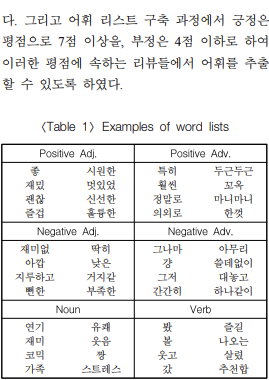

In [240]:
m_coco = coronacontent[(coronacontent['score'] ==5) | (coronacontent['score'] ==6)]

In [258]:
len(m_coco)

53

In [268]:
dist = pd.DataFrame({'긍정':[1122], '부정':[371],'중립':[53]},index=['count']).T

In [286]:
colors = ['#8fd9b6','#ff9999','#ffc000']

In [296]:
wedgeprops={'width': 0.75, 'edgecolor': 'w', 'linewidth': 5}

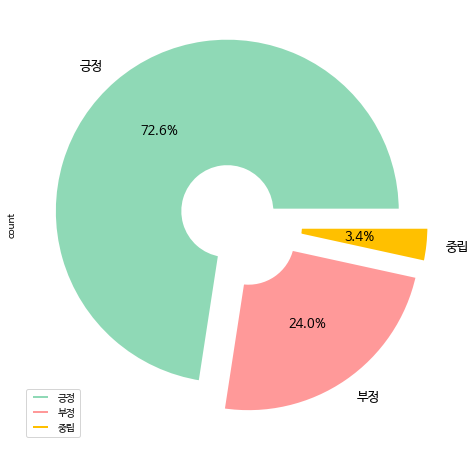

In [297]:
plot = dist.plot.pie(y='count',figsize=(8,8),fontsize=13, explode = (00.1,0.1,0.1),autopct='%1.1f%%',colors=colors,wedgeprops=wedgeprops)

In [224]:
n_coco = coronacontent[coronacontent['score'] < 5]
p_coco = coronacontent[coronacontent['score'] > 6]

print(f'긍정 리뷰 수: {len(p_coco)}       부정 리뷰 수: {len(n_coco)}')

긍정 리뷰 수: 1122       부정 리뷰 수: 371


## 
* 긍정리뷰 1122개, 부정리뷰 371개

<BarContainer object of 3 artists>

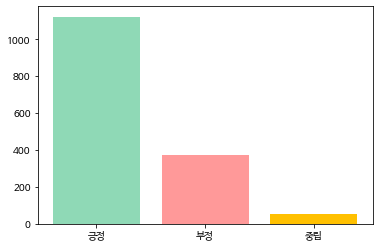

In [307]:
plt.bar(['긍정','부정','중립'], (len(p_coco), len(n_coco),  len(m_coco)),color=colors)

In [311]:
pnc = ['#c2c2f0','#ffb3e6']

<BarContainer object of 2 artists>

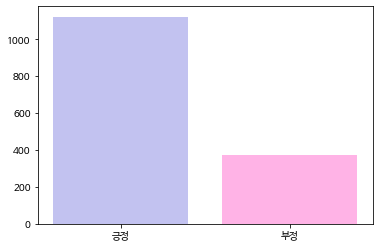

In [312]:
plt.bar(['긍정', '부정'], (len(p_coco), len(n_coco)),color=pnc)

In [6]:
ncc = n_coco['content'].tolist()

In [7]:
pcc = p_coco['content'].tolist()

## 코로나 부정 리뷰

In [11]:
li = []
for line in ncc:
    li.append(line[:-1])

In [12]:
li[:2]

['코로나땜에 집에서 5500원주고 결제했는데 눈이 썩어버렸',
 '살면서 이런 글 처음 남겨봅니다. 영화 내용에서 뭘 알려주고자 하는지 봉준호 감독 본인이 더 잘 알았을텐데요. 지금 국민들은 코로나 바이러스 때문에 집밖도 못나가고 갇혀있는데 기득권층끼리 앉아서 하하호호 짜파구리 먹..']

In [13]:
word_tag = []
for sentence in li:
    morph = okt.pos(sentence)
    word_tag.append(morph)

In [16]:
bucket_list = []
for my_sentence in word_tag:
    for word, tag in my_sentence:
        if tag in ['Noun']:
            bucket_list.append(word)

In [17]:
# 단어 빈도수 구하기
# 각 원소의 출현 횟수를 계산하는 Counter 모듈을 활용한다.
from collections import Counter
counts = Counter(bucket_list)
print(counts)

Counter({'코로나': 379, '영화': 292, '때문': 70, '이': 50, '개봉': 49, '진짜': 46, '평점': 36, '스토리': 35, '사람': 34, '감독': 33, '것': 33, '그냥': 30, '걸': 29, '영화관': 29, '거': 29, '볼': 29, '점': 28, '돈': 28, '시간': 27, '시국': 26, '정말': 26, '왜': 23, '연기': 23, '중국': 22, '더': 21, '최악': 21, '뭐': 20, '극장': 20, '개연': 20, '우한': 19, '때': 19, '내용': 18, '정도': 18, '상영': 18, '보고': 18, '처음': 17, '내': 17, '알바': 17, '나': 16, '말': 16, '연출': 16, '수준': 16, '그': 15, '배우': 15, '만': 14, '쓰레기': 14, '짱깨': 14, '피': 14, '임': 13, '요즘': 13, '느낌': 13, '듯': 12, '좀': 12, '도': 12, '영': 12, '땜': 11, '핑계': 11, '재미': 11, '진심': 11, '알': 11, '못': 11, '이건': 11, '무슨': 11, '별로': 11, '급': 11, '생각': 11, '감동': 10, '개': 10, '중간': 10, '후': 10, '노잼': 10, '실망': 10, '보지': 10, '눈': 9, '지금': 9, '바이러스': 9, '첫': 9, '영화로': 9, '이해': 9, '장면': 9, '안': 9, '전': 8, '제대로': 8, '시기': 8, '우리': 8, '줄': 8, '시대': 8, '결말': 8, '폐렴': 8, '별': 7, '봄': 7, '명': 7, '작품': 7, '긴장감': 7, '제발': 7, '드라마': 7, '뻔': 7, '수': 7, '집': 6, '판': 6, '시작': 6, '하나': 6, '중': 6, '놈': 6, '로': 6, '액션'

In [18]:
# 명사 빈도 순서대로 상위 30개 출력
print(counts.most_common(30))

[('코로나', 379), ('영화', 292), ('때문', 70), ('이', 50), ('개봉', 49), ('진짜', 46), ('평점', 36), ('스토리', 35), ('사람', 34), ('감독', 33), ('것', 33), ('그냥', 30), ('걸', 29), ('영화관', 29), ('거', 29), ('볼', 29), ('점', 28), ('돈', 28), ('시간', 27), ('시국', 26), ('정말', 26), ('왜', 23), ('연기', 23), ('중국', 22), ('더', 21), ('최악', 21), ('뭐', 20), ('극장', 20), ('개연', 20), ('우한', 19)]


In [29]:
bucket_list_2 = []

In [32]:
# 명사와 형용사를 모두 추출하고 상위 50개를 출력
bucket_list_2 = []
for my_sentence in word_tag:
    for word, tag in my_sentence:
        if tag in ['Noun','Adjective'] and len(word) > 1:
            bucket_list_2.append(word)
counts = Counter(bucket_list_2)
print(counts.most_common(50))

[('코로나', 379), ('영화', 292), ('때문', 70), ('개봉', 49), ('진짜', 46), ('없고', 41), ('평점', 36), ('스토리', 35), ('사람', 34), ('감독', 33), ('그냥', 30), ('영화관', 29), ('시간', 27), ('시국', 26), ('정말', 26), ('이런', 24), ('연기', 23), ('중국', 22), ('최악', 21), ('극장', 20), ('개연', 20), ('우한', 19), ('내용', 18), ('정도', 18), ('상영', 18), ('없어서', 18), ('보고', 18), ('처음', 17), ('입니다', 17), ('알바', 17), ('연출', 16), ('수준', 16), ('배우', 15), ('쓰레기', 14), ('짱깨', 14), ('요즘', 13), ('느낌', 13), ('없는', 12), ('핑계', 11), ('재미', 11), ('진심', 11), ('이건', 11), ('무슨', 11), ('별로', 11), ('생각', 11), ('감동', 10), ('중간', 10), ('노잼', 10), ('실망', 10), ('보지', 10)]


In [22]:
counts.most_common(50)[0]

('코로나', 379)

In [33]:
w_list = []

In [156]:
stop_words = list(set(stop_words))

In [151]:
# 명사와 형용사, 부사를 모두 추출하고 상위 100개를 출력
bucket_list_3 = []
w_list =[]
for my_sentence in word_tag:
    for word, tag in my_sentence:
        # 명사, 형용사, 부사 && 단어의 길이 2 이상만 
        if tag in ['Noun','Adjective','Adverb'] and len(word) > 1:
            bucket_list_3.append(word)
counts = Counter(bucket_list_3)
word_list = counts.most_common(100)
for w in word_list: # (리뷰 하나의) 단어 list에서 불용어 제거
    # print(w)
    if w[0] not in stop_words:
        w_list.append(w) # 유효단어 추출 후 append 

In [103]:
df1 = pd.DataFrame(w_list,columns = ['keyword', 'count'])

In [419]:
df1.to_csv('neg_keyword.csv',index=False)

In [104]:
df1.head(20)

,keyword,count
0,코로나,379
1,스토리,35
2,감독,33
3,시국,26
4,연기,23
5,중국,22
6,최악,21
7,극장,20
8,개연,20
9,우한,19


In [226]:
df1.tail(5)

,keyword,count
56,세계,5
57,마지막,5
58,부분,5
59,웃기,5
60,대한민국,5


In [93]:
w_list[1][0]

'스토리'

In [99]:
wc_list = []
for i in range(len(w_list)):
    wc_list.append(w_list[i][0])

In [ ]:
for sentence in reply:
    for noun in ok_twitter.nouns(sentence):
        if noun not in stop_word:
            text += noun+' '


In [24]:
df = pd.DataFrame(tmp_,columns = ['NAA', 'count'])

In [23]:
tmp_ = counts.most_common(50)

---

## 코로나 긍정 리뷰

In [111]:
li = []
for line in pcc:
    li.append(line[:-1])

In [112]:
li[:2]

['너무 더워서 열 좀 내릴려고 네이버에서 무료다운 받았는데, 관람후 학원 갔다가 37.5도 넘어서서 코로나 증상아니냐며 집으로 가라고 함',
 '악당들이 코로나 대비를 아주 잘해요, 막판 싸움에서 마스크를 아주 잘 썼어요. 그래서 10점 드립니다. 영화 자체는 재미없어요 하하하']

In [122]:
li[41:47]

['코로나만 아니었으면 극장에서 살았을 영화다 ㅠㅠ몇 년 후가 됐든 나중에 꼭 재개봉 해주길..',
 '끝없이 이어지는 참호가 만들어 내는 놀라운 연출, 전쟁 속 상황에서도 다양한 장면으로 영상미를 남기는 풍부함 코로나에 묻히지 않았다면 충분히 500만 이상은 기대해 볼만했던 영',
 '엄마 영화에서 코로나냄새',
 ' 코로나때문에 우울한 봄에 재미있는 로코 한 편으로 기분전환까지 되는',
 '코로나때문에 자동차 극장에서 봤는데 뭔가 새롭기도하고 음향조절도 가능하니까 편하게 재밌게 잘봤어요 코로나가 얼른 끝났으면 좋겠네요 ',
 ' 정말.. 결혼할 사람과 다시 보고 싶은 영화네요! 신부의 단장이 뭘까.. 묵상하게되는! 감사한 영화입니다.코로나 시대에 넘 조심스럽지만.. 강추드려용 .']

In [123]:
word_tag = []
for sentence in li:
    morph = okt.pos(sentence)
    word_tag.append(morph)

In [167]:
# 명사 빈도 순서대로 상위 30개 출력
print(counts.most_common(30))

[('코로나', 1147), ('영화', 817), ('때문', 243), ('너무', 235), ('연기', 134), ('배우', 130), ('정말', 127), ('극장', 122), ('감동', 121), ('진짜', 112), ('영화관', 103), ('시대', 97), ('개봉', 91), ('스토리', 90), ('사람', 82), ('생각', 80), ('시국', 79), ('입니다', 75), ('좋은', 74), ('있는', 71), ('힐링', 66), ('시간', 66), ('마음', 65), ('요즘', 63), ('보고', 61), ('많이', 60), ('시기', 57), ('많은', 56), ('같은', 55), ('재밌게', 48)]


In [157]:
# 명사와 형용사를 모두 추출하고 상위 50개를 출력
bucket_list_3 = []
w_list =[]
for my_sentence in word_tag:
    for word, tag in my_sentence:
        # 명사, 형용사, 부사 && 단어의 길이 2 이상만 
        if tag in ['Noun','Adjective','Adverb'] and len(word) > 1:
            bucket_list_3.append(word)
counts = Counter(bucket_list_3)
word_list = counts.most_common(100)
for w in word_list: # (리뷰 하나의) 단어 list에서 불용어 제거
    # print(w)
    if w[0] not in stop_words:
        w_list.append(w) # 유효단어 추출 후 append 
    # 리뷰별로 반복

    
df2 = pd.DataFrame(w_list,columns = ['keyword', 'count'])

In [420]:
df2.to_csv('pos_keyword.csv',index=False)

In [161]:
df2.head(30)

,keyword,count
0,코로나,1147
1,연기,134
2,배우,130
3,극장,122
4,감동,121
5,시대,97
6,스토리,90
7,시국,79
8,좋은,74
9,힐링,66


In [227]:
df2.tail(10)

,keyword,count
51,한번,23
52,덕분,22
53,강추,22
54,일상,22
55,영화로,22
56,노래,22
57,인생,22
58,위로,21
59,가장,21
60,바이러스,21


---

## Wordcloud 시각화 비교

## 긍정 리뷰

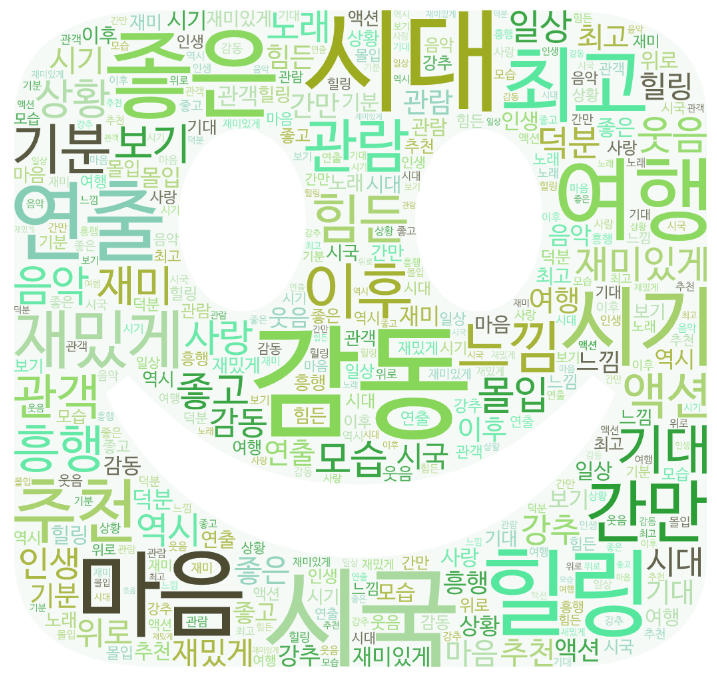

## 부정 리뷰

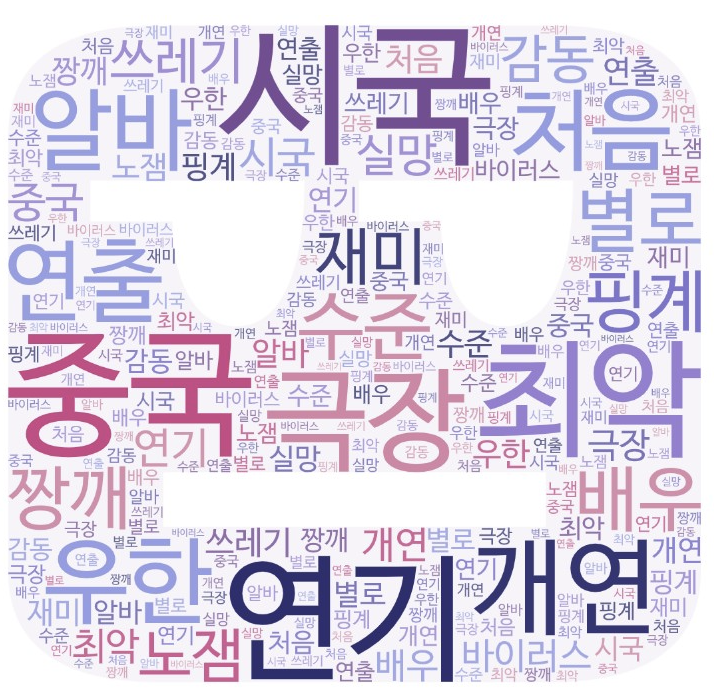